In [1]:
import numpy as np

In [53]:
import numpy as np

data=np.load('/content/testt/data.npy')
target=np.load('/content/testt/target.npy')

#loading the save numpy arrays in the previous code

In [57]:
from sklearn.utils import shuffle

In [58]:
data, target = shuffle(data,target)

In [60]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [74]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 98, 98, 200)       2000      
_________________________________________________________________
activation_2 (Activation)    (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_3 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 52900)            

In [61]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [62]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - 77s 2s/step - loss: 0.7161 - accuracy: 0.5405 - val_loss: 0.5480 - val_accuracy: 0.7500
INFO:tensorflow:Assets written to: model-001.model/assets
Epoch 2/20
31/31 [==============================] - 75s 2s/step - loss: 0.5273 - accuracy: 0.7200 - val_loss: 0.3284 - val_accuracy: 0.8710
INFO:tensorflow:Assets written to: model-002.model/assets
Epoch 3/20
31/31 [==============================] - 74s 2s/step - loss: 0.2986 - accuracy: 0.8808 - val_loss: 0.3645 - val_accuracy: 0.8266
Epoch 4/20
31/31 [==============================] - 75s 2s/step - loss: 0.1916 - accuracy: 0.9353 - val_loss: 0.1992 - val_accuracy: 0.9234
INFO:tensorflow:Assets written to: model-004.model/assets
Epoch 5/20
31/31 [==============================] - 75s 2s/step - loss: 0.1328 - accuracy: 0.9531 - val_loss: 0.1294 - val_accuracy: 0.9516
INFO:tensorflow:Assets written to: model-005.model/assets
Epoch 6/20
31/31 [==============================] - 75s 2s/step - lo

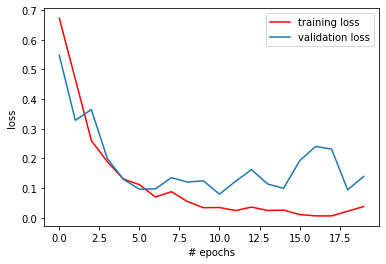

In [66]:

from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

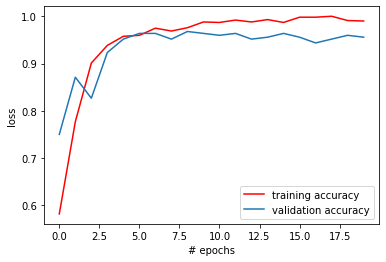

In [67]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [68]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 3s 514ms/step - loss: 0.2850 - accuracy: 0.9275
[0.28501656651496887, 0.9275362491607666]


In [112]:
import cv2
image = cv2.imread('/content/mask.jfif')

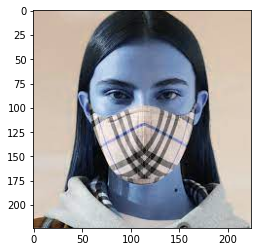

In [113]:
from matplotlib import pyplot as plt
plt.imshow(image)

In [114]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
result=model.predict(reshaped)

label=np.argmax(result,axis=1)[0]

In [115]:
result

array([[0.9979013 , 0.00209868]], dtype=float32)

In [116]:
labels_dict={0:'MASK',1:'NO MASK'}

In [117]:
labels_dict[label]

'MASK'

In [118]:
image = cv2.imread('/content/Shashank2.jpeg')

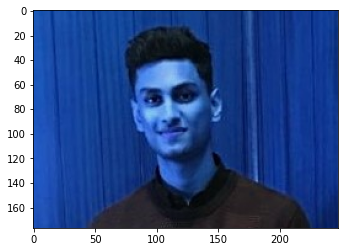

In [119]:
from matplotlib import pyplot as plt
plt.imshow(image)

In [120]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized=cv2.resize(gray,(100,100))
normalized=resized/255.0
reshaped=np.reshape(normalized,(1,100,100,1))
result=model.predict(reshaped)

label=np.argmax(result,axis=1)[0]

In [121]:
result

array([[0.02325497, 0.97674507]], dtype=float32)

In [122]:
labels_dict[label]

'NO MASK'

In [123]:
 !zip -r finalmodel.zip /content/finalmodel

updating: content/finalmodel/ (stored 0%)
updating: content/finalmodel/variables/ (stored 0%)
updating: content/finalmodel/variables/variables.index (deflated 63%)
updating: content/finalmodel/variables/variables.data-00000-of-00001 (deflated 11%)
updating: content/finalmodel/assets/ (stored 0%)
updating: content/finalmodel/saved_model.pb (deflated 88%)


In [101]:
from google.colab import files

files.download("/content/final_weights.data-00000-of-00001")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>